# Installing and Importing packages

In [ ]:
# install web_driver_manager
!pip install webdriver_manager
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 4.7 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu 

In [ ]:
import pandas as pd
import time
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

# Web Scraping

In [ ]:
#creating the webdriver so that we can manipulate chrome pages...

driver = webdriver.Chrome('chromedriver',options=options)
url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(url)


In [ ]:
#A little delay so that everything on the webpage renders...
time.sleep(3)

# Extracting the book categories using the class name of the list elements on the html page...
book_categories = driver.find_elements(By.CLASS_NAME,"category-page__member-link")

In [ ]:
#Creating a data structure to store book name with book url...
books = []
for book in book_categories:
  book_name = book.text
  book_url = book.get_attribute('href')
  books.append({'book_name': book_name, 'book_url': book_url})

In [ ]:
#Creating a data structure to store book name with Characters from that respective book...
character_list = []

for book in books:
  driver.get(book['book_url'])

  char_elems = driver.find_elements(By.CLASS_NAME,"category-page__member-link")

  for elem in char_elems:
      character_list.append({'book_name': book['book_name'], 'character':elem.text})


In [ ]:
#Convert the data structure to a pandas dataframe...
df = pd.DataFrame(character_list)

# Cleaning up

In [ ]:
#Creating Book No identifier to make further preprocessing by book easier...

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['book_no'] = le.fit_transform(df['book_name'])

In [ ]:
#what the labels represent...
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10])

array(['Category:Baptism of Fire characters',
       'Category:Blood of Elves characters',
       'Category:Season of Storms characters',
       'Category:Something Ends, Something Begins characters',
       'Category:Sword of Destiny characters',
       'Category:Szpony i kły characters',
       'Category:Tales from the world of The Witcher characters',
       'Category:The Lady of the Lake characters',
       'Category:The Last Wish characters',
       'Category:The Tower of the Swallow characters',
       'Category:Time of Contempt characters'], dtype=object)

In [ ]:
#removing books which are not a part of the main book series (Books 1-8)...
df = df[(df['book_no'] != 2) & (df['book_no'] != 5) & (df['book_no'] != 6) ]



#Changing the book_nos so that they represent the reading order of the books rather than random labels...
df['book_no'].replace(to_replace=[0,1,3,4,7,8,9,10], value = [5,3,8,2,7,1,6,4],inplace=True)
df.sort_values('book_no',axis=0,inplace=True,ignore_index=True)


#Making the book names look cleaner...
booknames = ['The Last Wish',
'Sword of Destiny',
'Blood of Elves',
'Time of Contempt',
'Baptism of Fire',
'The Tower of the Swallow',
'The Lady of the Lake',
'Something Ends, Something Begins']
oldbooknames = [      'Category:The Last Wish characters',
       'Category:Sword of Destiny characters',
       'Category:Blood of Elves characters',
       'Category:Time of Contempt characters',
       'Category:Baptism of Fire characters',
       'Category:The Tower of the Swallow characters',
       'Category:The Lady of the Lake characters',
       'Category:Something Ends, Something Begins characters']
df1 = df.replace(to_replace=oldbooknames, value=booknames)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df1.head()

,book_name,character,book_no
0,The Last Wish,Roach,1
1,The Last Wish,Sancia of Sodden,1
2,The Last Wish,Rumplestelt,1
3,The Last Wish,Rulle Asper,1
4,The Last Wish,Roegner of Ebbing,1


In [ ]:
csv_data = df1.to_csv('/content/drive/MyDrive/Datasets/witcher_character.csv')

# Relationship Analysis

## Installing spacy

In [ ]:
!pip install spacy networkx pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=7105603b4dd50106294099cb4444fdf8a44df12a96af216e1e0203a68cc420fc
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis


## Getting the Books

In [ ]:
import pandas as pd
import spacy
from spacy import displacy
import os

In [ ]:
NER = spacy.load("en_core_web_sm")

In [ ]:
all_books = [b for b in os.scandir('/content/drive/MyDrive/data/witcher books') if '.txt' in b.name]

In [ ]:
all_books

[<DirEntry 'B - The Sword of Destiny.txt'>,
 <DirEntry 'E - something ends something begins.txt'>,
 <DirEntry 'I - Blood of Elves.txt'>,
 <DirEntry 'III - Baptism of Fire.txt'>,
 <DirEntry 'II - Times of Contempt.txt'>,
 <DirEntry 'IV - The Tower of the Swallow.txt'>,
 <DirEntry 'C - The Last Wish.txt'>,
 <DirEntry 'V - The Lady of the Lake.txt'>]

In [ ]:
book = all_books[7]

In [ ]:
book_txt = open(book).read()
book_doc = NER(book_txt)

In [ ]:
displacy.render(book_doc[0:2000], style='ent', jupyter=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/witcher_character.csv')
df.head()

,Unnamed: 0,book_name,character,book_no
0,0,The Last Wish,Roach,1
1,1,The Last Wish,Sancia of Sodden,1
2,2,The Last Wish,Rumplestelt,1
3,3,The Last Wish,Rulle Asper,1
4,4,The Last Wish,Roegner of Ebbing,1


In [ ]:
df['book_name'].unique()

array(['The Last Wish', 'Sword of Destiny', 'Blood of Elves',
       'Time of Contempt', 'Baptism of Fire', 'The Tower of the Swallow',
       'The Lady of the Lake', 'Something Ends, Something Begins'],
      dtype=object)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
import re
df['character'] = df['character'].apply(lambda x: re.sub("[\(].*?[\)]","",x))
df['first_name'] = df['character'].apply(lambda x: x.split(" ",1)[0])


In [ ]:
df.head()

,book_name,character,book_no,first_name
0,The Last Wish,Roach,1,Roach
1,The Last Wish,Sancia of Sodden,1,Sancia
2,The Last Wish,Rumplestelt,1,Rumplestelt
3,The Last Wish,Rulle Asper,1,Rulle
4,The Last Wish,Roegner of Ebbing,1,Roegner


In [ ]:
sent_entity_df = []

for sent in book_doc.sents:
  entity_list = [ent.text for ent in sent.ents]
  sent_entity_df.append({'sentence':sent, 'entities':entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [ ]:
 def entity_filter(entity_list,df):
  return [ent for ent in entity_list
          if ent in list(df.character)
          or ent in list(df.first_name)]

In [ ]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: entity_filter(x,df))

filtered_ent_df = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]

filtered_ent_df.head()

,sentence,entities,character_entities
0,"( \n, THE, LADY, OF, THE, LAKE, \n \n \n\n, Th...",[Arthur],[Arthur]
1,"(', Behold, ,, there, is, the, sword, of, whic...",[Merlin],[Merlin]
3,"(', Who, is, that, girl, ?, ', asked, Arthur, ...",[Arthur],[Arthur]
4,"(', That, is, the, Lady, of, the, Lake, ,, ', ...",[Merlin],[Merlin]
91,"(', I, am, Galahad, ,, of, Caer, Benice, .)","[Galahad, Caer Benice]",[Galahad]


In [ ]:
filtered_ent_df['character_entities'] = filtered_ent_df['character_entities'].apply(lambda x: [item.split()[0] for item in x])
filtered_ent_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sentence,entities,character_entities
0,"( \n, THE, LADY, OF, THE, LAKE, \n \n \n\n, Th...",[Arthur],[Arthur]
1,"(', Behold, ,, there, is, the, sword, of, whic...",[Merlin],[Merlin]
3,"(', Who, is, that, girl, ?, ', asked, Arthur, ...",[Arthur],[Arthur]
4,"(', That, is, the, Lady, of, the, Lake, ,, ', ...",[Merlin],[Merlin]
91,"(', I, am, Galahad, ,, of, Caer, Benice, .)","[Galahad, Caer Benice]",[Galahad]


In [ ]:
window_size = 5
relationships = []
for i in range(filtered_ent_df.index[-1]):
  end_i = min(i+window_size,filtered_ent_df.index[-1])
  char_list = sum((filtered_ent_df.iloc[i:end_i].character_entities),[])

  char_unique = [char_list[i] for i in range(len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1]]
  if len(char_unique) > 1:
    for idx, a in enumerate(char_unique[:-1]):
        b = char_unique[idx + 1]
        relationships.append({'source': a , 'target': b})


In [ ]:
relations = pd.DataFrame(relationships)

In [ ]:
relations.head()

,source,target
0,Arthur,Merlin
1,Merlin,Arthur
2,Arthur,Merlin
3,Merlin,Galahad
4,Merlin,Arthur


In [ ]:
import numpy as np
relations = pd.DataFrame(np.sort(relations.values,axis=1), columns=relations.columns)

In [ ]:
relations.head()

,source,target
0,Arthur,Merlin
1,Arthur,Merlin
2,Arthur,Merlin
3,Galahad,Merlin
4,Arthur,Merlin


In [ ]:
relations['weight'] = 1

In [ ]:
relations = relations.groupby(['source','target'], sort=False, as_index=False).sum()

In [ ]:
relations.head()

,source,target,weight
0,Arthur,Merlin,6
1,Galahad,Merlin,8
2,Galahad,Kelpie,8
3,Galahad,Seven,8
4,Ciri,Merlin,4


In [ ]:
import networkx as nx

G =  nx.from_pandas_edgelist(relations,source='source',target='target',edge_attr='weight', create_using=nx.Graph())

In [ ]:
import matplotlib.pyplot as plt

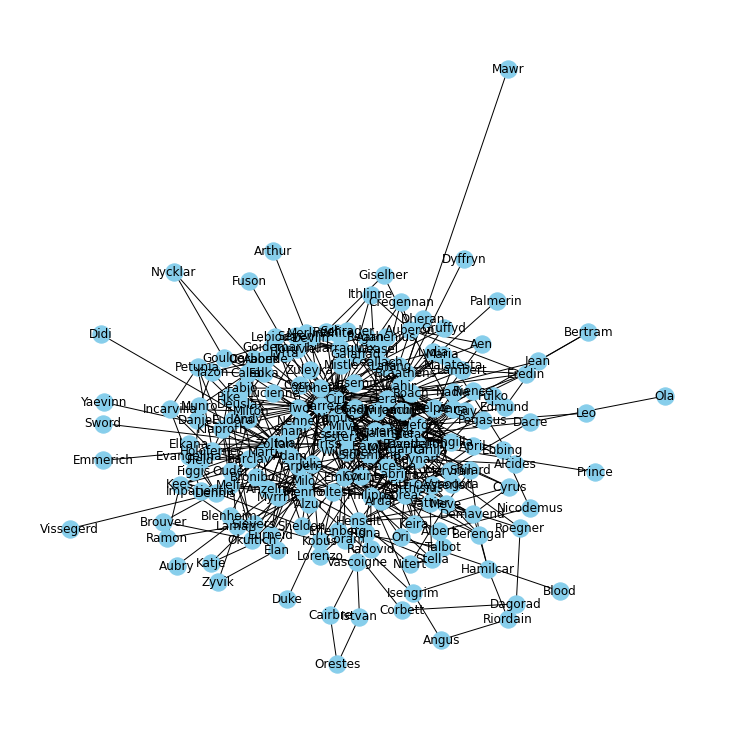

In [ ]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color = 'skyblue', edge_cmap= plt.cm.Blues, pos = pos)
plt.show()

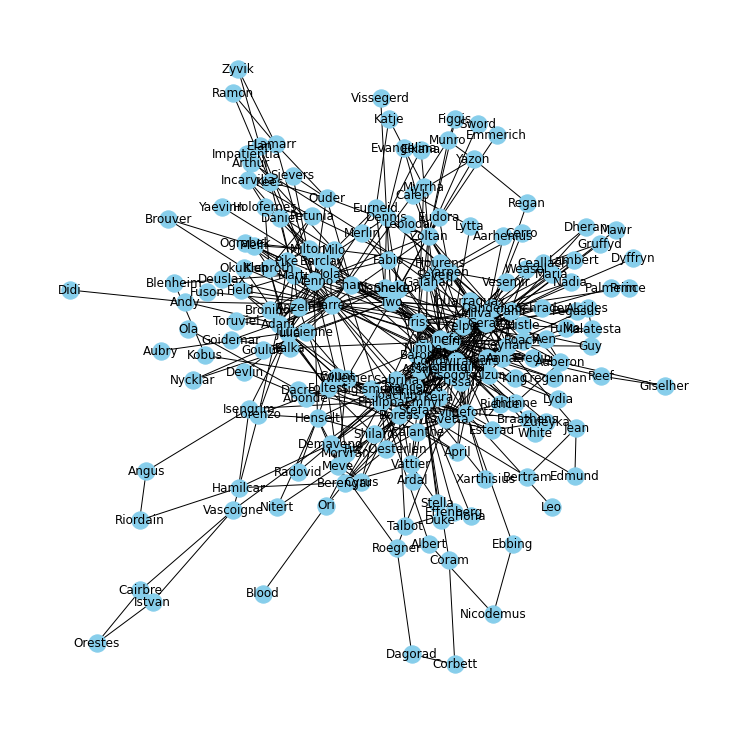

In [ ]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color = 'skyblue', edge_cmap= plt.cm.Blues, pos = pos)
plt.show()

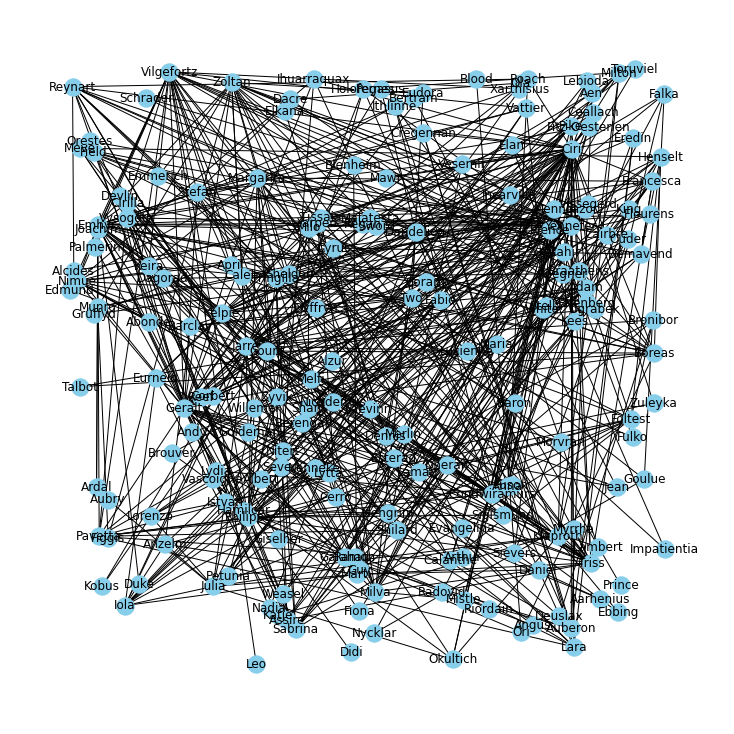

In [ ]:
plt.figure(figsize=(10,10))
pos = nx.random_layout(G)
nx.draw(G, with_labels=True, node_color = 'skyblue', edge_cmap= plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 17.5 MB/s 
     |████████████████████████████████| 1.6 MB 65.7 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=d9b184639b50f357fdd267ee75cb2a90dedc76d25751f77a735174af4727649a
  Stored in directory: /root/.cache/pip/wheels/12/17/67/179b65f101f0d0236e67b2fa039e5d387806348e80205c6985
Successfully built pyvis


In [ ]:
from pyvis.network import Network
from IPython.core.display import display, HTML


net = Network(notebook = True, width = "1000px", height = "700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

nx.set_node_attributes(G,node_degree,'size')
net.from_nx(G)
net.show('witcher.html')
display(HTML('witcher.html'))

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


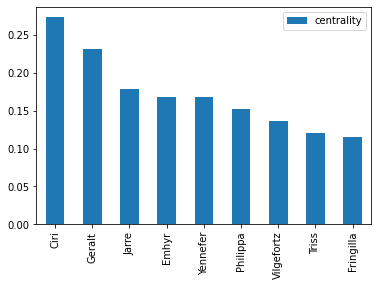

In [ ]:
degree_dict = nx.degree_centrality(G)

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns = ['centrality'])

degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

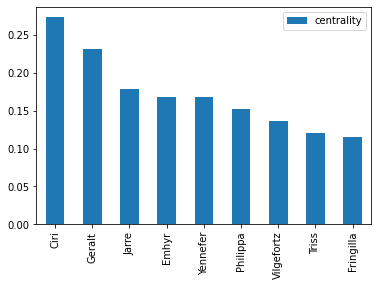

In [ ]:
between_dict = nx.betweenness_centrality(G)

between_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns = ['centrality'])

between_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

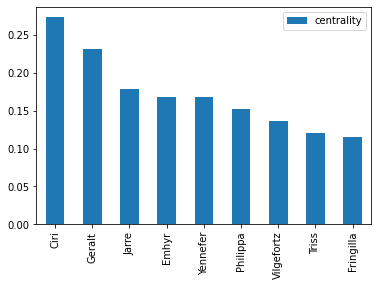

In [ ]:
closeness_dict = nx.closeness_centrality(G)

closeness_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns = ['centrality'])

closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

In [ ]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, between_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [ ]:
import community.community_louvain as community_louvain

In [ ]:
communities = community_louvain.best_partition(G)

In [ ]:
nx.set_node_attributes(G, communities, 'group')

In [ ]:
net = Network(notebook = True, width = "1000px", height = "700px", bgcolor='#222222', font_color='white')

net.from_nx(G)
net.show('witcher_communities.html')
display(HTML('witcher_communities.html'))

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
